# Crime_Project
### Major Cities Observations and Trends

In [1]:
from urllib.parse import urlencode, urlparse, parse_qsl
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

# Census & gmaps API Keys
from config import census_key, g_key

# Import my GoogleMap object with following methods:
        # extract_lat_lng(location)
        # search(keyword, radius = 1000, location=None)
        # detail(place_id, fields=["name", "rating", "formatted_phone_number", "formatted_address"])
from my_func import GoogleMapClient

In [2]:
def cities_coord(df):
    for row in df.itertuples():
        client = GoogleMapClient(api_key = g_key, address_or_postal_code = f'{row.City}')
        try: 
            df.loc[row.Index, 'Lat'] = client.lat
            df.loc[row.Index, 'Lng'] = client.lng
        except:
            pass
        if row.Index % 30 == 0: 
            print('Processing records: found ', row.Index,' cities')
    print('\nProcessing is over\n')
    return df

#### Import and Clean List of major US cities over 50k population (788 cities)

In [3]:
# Reading and Cleaning DataSet (Data Source: Census.org)
uscities_data = pd.read_excel('resources/uscities_over50k.xlsx', header=None) 
uscities_data.columns = uscities_data.iloc[1]
uscities_data.drop([0,1], axis=0, inplace=True)
uscities_data.set_index('Rank', inplace=True)
uscities_data = uscities_data.rename(columns={"Census": "Cens_2010",
                                      "Estimates Base": "Base_2010",
                                      2010.0: "2010", 2011.0: "2011",
                                      2012.0: "2012", 2013.0: "2013",
                                      2014.0: "2014", 2015.0: "2015",
                                      2016.0: "2016", 2017.0: "2017",
                                      2018.0: "2018", 2019.0: "2019"})
uscities_data.head()
for column in uscities_data.columns[2:]:
    uscities_data[column]= uscities_data[column].astype(float)
uscities_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 1 to 788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       788 non-null    object 
 1   Cens_2010  788 non-null    object 
 2   Base_2010  788 non-null    float64
 3   2010       788 non-null    float64
 4   2011       788 non-null    float64
 5   2012       788 non-null    float64
 6   2013       788 non-null    float64
 7   2014       788 non-null    float64
 8   2015       788 non-null    float64
 9   2016       788 non-null    float64
 10  2017       788 non-null    float64
 11  2018       788 non-null    float64
 12  2019       788 non-null    float64
dtypes: float64(11), object(2)
memory usage: 86.2+ KB


In [4]:
uscities_data = cities_coord(uscities_data)

Processing records: found  30  cities
Processing records: found  60  cities
Processing records: found  90  cities
Processing records: found  120  cities
Processing records: found  150  cities
Processing records: found  180  cities
Processing records: found  210  cities
Processing records: found  240  cities
Processing records: found  270  cities
Processing records: found  300  cities
Processing records: found  330  cities
Processing records: found  360  cities
Processing records: found  390  cities
Processing records: found  420  cities
Processing records: found  450  cities
Processing records: found  480  cities
Processing records: found  510  cities
Processing records: found  540  cities
Processing records: found  570  cities
Processing records: found  600  cities
Processing records: found  630  cities
Processing records: found  660  cities
Processing records: found  690  cities
Processing records: found  720  cities
Processing records: found  750  cities
Processing records: found  7

In [5]:
uscities_data.head()

1,City,Cens_2010,Base_2010,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Lat,Lng
Rank,,,,,,,,,,,,,,,
1,"New York city, New York",8175133,"8,175,031.00","8,190,209.00","8,272,948.00","8,346,693.00","8,396,091.00","8,433,806.00","8,463,049.00","8,469,153.00","8,437,478.00","8,390,081.00","8,336,817.00",40.71,-74.01
2,"Los Angeles city, California",3792621,"3,793,139.00","3,795,512.00","3,820,876.00","3,851,202.00","3,881,622.00","3,909,901.00","3,938,568.00","3,963,226.00","3,975,788.00","3,977,596.00","3,979,576.00",34.05,-118.24
3,"Chicago city, Illinois",2695598,"2,695,652.00","2,697,477.00","2,708,114.00","2,719,141.00","2,725,731.00","2,727,066.00","2,724,344.00","2,716,723.00","2,711,069.00","2,701,423.00","2,693,976.00",41.88,-87.63
4,"Houston city, Texas",2099451,"2,095,517.00","2,100,280.00","2,126,032.00","2,161,593.00","2,199,391.00","2,241,826.00","2,286,908.00","2,309,544.00","2,316,750.00","2,318,573.00","2,320,268.00",29.76,-95.37
5,"Phoenix city, Arizona",1445632,"1,446,691.00","1,449,038.00","1,469,796.00","1,499,274.00","1,526,491.00","1,555,445.00","1,583,690.00","1,612,199.00","1,633,560.00","1,654,675.00","1,680,992.00",33.45,-112.07


In [6]:
uscities_data.to_csv("resources/uscities_data.csv", encoding="utf-8", index=False)

#### Import and Clean Murders Datasets of 79 US big cities

In [7]:
# Reading and Cleaning DataSet for 79 major cities (Data Source: Data.org)
cities_murders = pd.read_csv('resources/murder_2015.csv', header=None)
cities_murders = cities_murders.rename(columns={0: 'City', 1: 'State', 2: '2014', 3: '2015', 4: '% Change'})
cities_murders = cities_murders.drop([0])
cities_murders[['2014', '2015', '% Change']] = cities_murders[['2014', '2015', '% Change']].astype(int)
cities_murders[['City', 'State']] = cities_murders[['City', 'State']].astype('str')
cities_murders = cities_murders.sort_values('2015', ascending=False).set_index('City')
cities_murders.head(10)

,State,2014,2015,% Change
City,,,,
Chicago,Illinois,411,478,67
New York,New York,333,352,19
Baltimore,Maryland,211,344,133
Houston,Texas,242,303,61
Detroit,Michigan,298,295,-3
Los Angeles,California,260,282,22
Philadelphia,Pennsylvania,248,280,32
St. Louis,Missouri,159,188,29
New Orleans,Louisiana,150,164,14


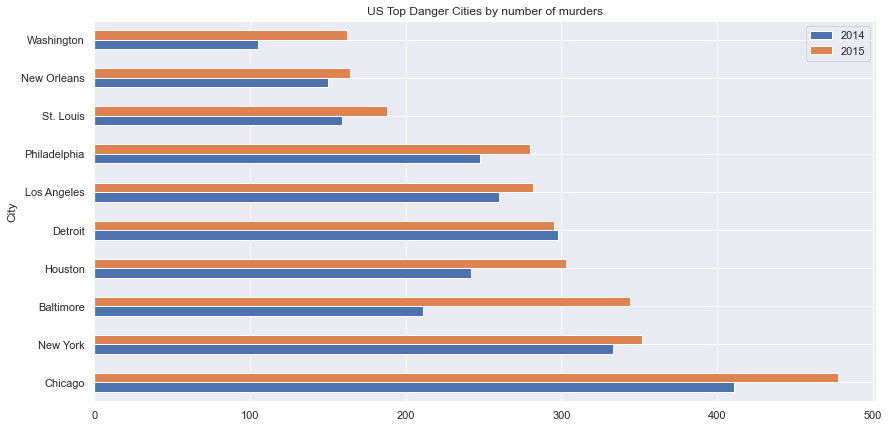

In [8]:
top_danger_cities = cities_murders.head(10).filter(['State', '2014', '2015'])
_= top_danger_cities.plot(kind='barh', title="US Top Danger Cities by number of murders", figsize=(14, 7))

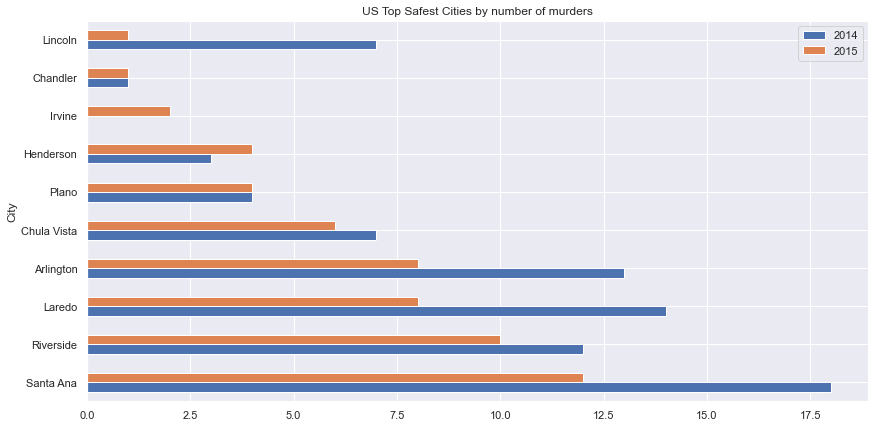

In [9]:
top_safest_cities = cities_murders.tail(10).filter(['State', '2014', '2015'])
_= top_safest_cities.plot(kind='barh', title="US Top Safest Cities by number of murders", figsize=(14, 7))

#### Adding Population and Calculating Adjusted Number for Dataset of 79 US big cities

In [10]:
# DataSet of 788 US Major Cities: Split City Name into 2 columns - City and State
for row in uscities_data.itertuples():
    full_city_name = row.City.split(",", 2)
    city_name = full_city_name[0]
    uscities_data.loc[row.Index, 'City'] = city_name.split(" city", 2)[0]
    uscities_data.loc[row.Index, 'State'] = full_city_name[1]

In [11]:
# Adding Estimate Population Data for 2014, 2015 from 788 Major Cities DataFrame
cities_murders = cities_murders.reset_index()
for row_79 in cities_murders.itertuples():
    for row_788 in uscities_data.itertuples():
        if row_79.City == row_788.City:
            cities_murders.loc[row_79.Index, 'Pop_2014'] = uscities_data.loc[row_788.Index, '2014'].astype(int)
            cities_murders.loc[row_79.Index, 'Pop_2015'] = uscities_data.loc[row_788.Index, '2015'].astype(int)
# Calculating adjusted rate of murders per 100k population
cities_murders['2014_adj'] = cities_murders['2014']/cities_murders['Pop_2014']*100000
cities_murders['2015_adj'] = cities_murders['2015']/cities_murders['Pop_2015']*100000
cities_murders = cities_murders.sort_values('2015_adj', ascending=False).set_index('City')

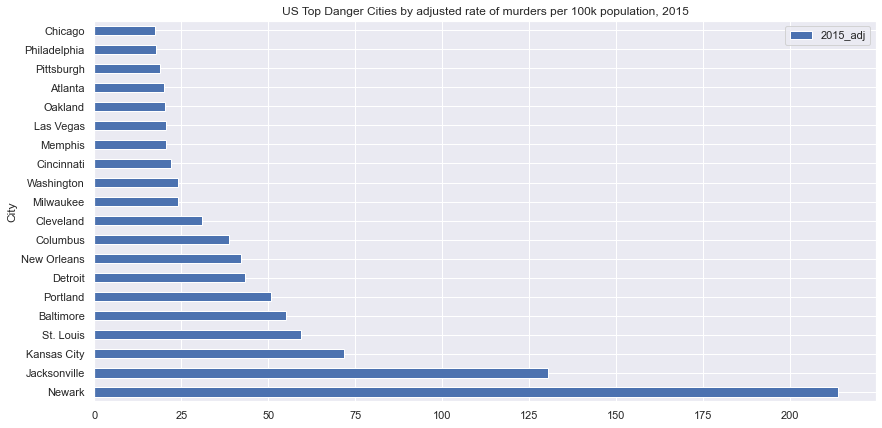

In [12]:
top_danger_cities = cities_murders.head(20).filter(['State', '2015_adj'])
_= top_danger_cities.plot(kind='barh', title="US Top Danger Cities by adjusted rate of murders per 100k population, 2015", figsize=(14, 7))
plt.savefig('images/top20_danger_cities.png')

In [14]:
cities_murders = cities_murders.reset_index()
cities_murders = cities_coord(cities_murders)

Processing records: found  0  cities
Processing records: found  30  cities
Processing records: found  60  cities

Processing is over



In [ ]:
# Saving Datasets
uscities_data.to_csv("resources/uscities_data.csv", encoding="utf-8", index=False)
cities_murders.to_csv("resources/cities_murders.csv", encoding="utf-8", index=False)
cities_murders.head()

In [ ]:
# Reading and Cleaning DataSet for 79 cities (Data Source: Data.org) - preliminary data
cities_murders_2016 = pd.read_csv('resources/murder_2016_prelim.csv', header=None).filter([0,1,2,3,4])
cities_murders_2016 = cities_murders_2016.rename(columns={0: 'City', 1: 'State', 2: '2015', 3: '2016', 4: '% Change'})
cities_murders_2016 = cities_murders_2016.drop([0])
cities_murders_2016 = cities_murders_2016.sort_values('City', ascending=True)
cities_murders_2016[['2015', '2016', '% Change']] = cities_murders_2016[['2015', '2016', '% Change']].astype(int)
cities_murders_2016[['City', 'State']] = cities_murders_2016[['City', 'State']].astype('str')
cities_murders_2016 = cities_murders_2016.sort_values('2015', ascending=False)